In [1]:
# The least mean squares (LMS) algorithm 
import numpy as np
import matplotlib.pyplot as plt

def LMS(u, d, p, step):
    N = len(u)
    # Initialization
    b = np.zeros(p) # Filter output
    e = np.zeros(N) # Error signal
    y = np.zeros(N) # Filter output
    
    # Equalise
    for i in range(p, N):
        X = u[i:i-p:-1]
        y[i] = np.dot(b.transpose(), X)
        e[i]= d[i] - y[i]
        b = b + e[i]*step*X

    return e

In [6]:
import pandas as pd

trainData = pd.read_csv("lms-data-new-m.txt", header=None)
u = trainData.values[:, 0]
print("shape u ", u.shape)
d = trainData.values[:, 1]
print("shape d ", d.shape)

M       = 4     # order
step    = 0.2   # step size



shape u  (1000,)
shape d  (1000,)


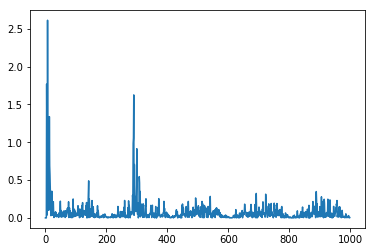

In [7]:
# plotting error signal decreasing
e = LMS(u, d, M, step)
plt.figure()
plt.plot(np.abs(e))
plt.show()
